<a href="https://colab.research.google.com/github/Sufyan-work81/Sufyan-work81/blob/main/SportsBet_2025_Predictive_Analytics%7CML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="071952" size="6" face="Baskerville">**SportsBet 2025: Predictive Analytics Dataset**</font>

---

## <font color="black" size="4" face="poppins">**Author: Sufyan Ahmad**</font>

<a href="https://github.com/Sufyan786786" target="_blank">🐙 GitHub</a><br>

<a href="https://www.kaggle.com/sufya6/www.linkedin.com/in/sufyan-anayat-ali-90488a292" target="_blank">💼 LinkedIn</a><br>

<a href="mailto:portfoliosufyan@gmail.com">📧 Email</a>



<font color="Black" size="3.5" face="poppins">**Description:**
The SportsBet 2025 dataset provides detailed historical sports betting data, including match results, team statistics, odds from multiple bookmakers, and outcomes across various sports and leagues. Ideal for machine learning projects in predictive modeling, the dataset allows analysis of betting trends, win/loss probabilities, and betting strategy optimization. It includes features like team form, player performance, weather conditions, and pre-match odds. Suitable for building classification models, regression models, or evaluating betting strategies with real-world data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### ***Import the dataset***

---


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/real_dataset/sports_betting_predictive_analysis.csv')
df.head(20)

,Match_ID,Date,Sport,Home_Team,Away_Team,Home_Team_Odds,Away_Team_Odds,Draw_Odds,Predicted_Winner,Actual_Winner
0,M00001,2024-01-24,Basketball,Gonzalezmouth Tigers,Hernandezfurt Lions,3.62,3.99,NaN,Hernandezfurt Lions,Hernandezfurt Lions
1,M00002,2025-05-03,Basketball,Rothstad Wolves,North Manuel Eagles,1.84,NaN,NaN,Rothstad Wolves,Rothstad Wolves
2,M00003,2025-04-10,Baseball,Aliciaport Lions,West Gabrielton Lions,3.93,3.29,NaN,Aliciaport Lions,Aliciaport Lions
3,M00004,2024-08-02,Tennis,Lake Samantha Eagles,Simonshire Lions,3.70,3.61,NaN,Simonshire Lions,Lake Samantha Eagles
4,M00005,2024-10-05,Tennis,Brendanport Eagles,Williamsfurt Bears,2.26,2.52,NaN,Williamsfurt Bears,Brendanport Eagles
5,M00006,2024-01-05,Basketball,Jacobchester Tigers,Stevenside Lions,2.65,2.37,NaN,Jacobchester Tigers,Jacobchester Tigers
6,M00007,2024-01-28,Baseball,Kevintown Lions,Boydland Lions,3.24,4.63,NaN,Boydland Lions,Boydland Lions
7,M00008,2024-11-19,Tennis,Port Kimberly Tigers,Bakermouth Wolves,4.86,3.86,NaN,Bakermouth Wolves,Port Kimberly Tigers
8,M00009,2024-06-26,Hockey,Lake Karen Bears,Lake Jennifer Lions,1.35,1.89,4.88,Lake Jennifer Lions,Lake Karen Bears
9,M00010,2025-02-24,Basketball,Brownfurt Eagles,West Paul Eagles,4.65,4.32,NaN,Brownfurt Eagles,West Paul Eagles


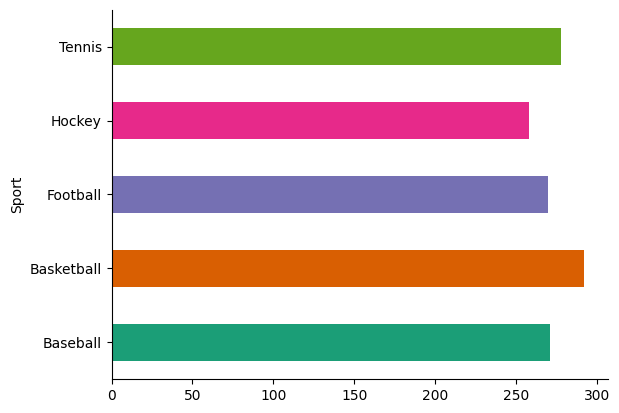

In [ ]:
# @title Sport

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sport').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.tail()

,Match_ID,Date,Sport,Home_Team,Away_Team,Home_Team_Odds,Away_Team_Odds,Draw_Odds,Predicted_Winner,Actual_Winner
1364,M01365,2025-04-25,Tennis,Brewerstad Bears,Isaacview Bears,1.37,2.47,NaN,Brewerstad Bears,Brewerstad Bears
1365,M01366,2023-09-07,Tennis,New Raymond Lions,New Ashleeberg Lions,3.74,4.93,NaN,New Raymond Lions,New Ashleeberg Lions
1366,M01367,2025-06-18,Basketball,Lewisburgh Bears,Lake Kristinbury Tigers,2.32,2.30,NaN,Lewisburgh Bears,Lewisburgh Bears
1367,M01368,2024-02-18,Basketball,Billport Lions,West Catherinemouth Bears,4.24,2.19,NaN,West Catherinemouth Bears,West Catherinemouth Bears
1368,M01369,2024-02-01,Basketball,Andreaside Eagles,Smithborough Lions,3.66,4.23,NaN,Smithborough Lions,Smithborough Lions


### ***EDA of Dataset***

---



In [ ]:
df.shape

(1369, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Match_ID          1369 non-null   object 
 1   Date              1369 non-null   object 
 2   Sport             1369 non-null   object 
 3   Home_Team         1369 non-null   object 
 4   Away_Team         1369 non-null   object 
 5   Home_Team_Odds    1298 non-null   float64
 6   Away_Team_Odds    1282 non-null   float64
 7   Draw_Odds         498 non-null    float64
 8   Predicted_Winner  1369 non-null   object 
 9   Actual_Winner     1369 non-null   object 
dtypes: float64(3), object(7)
memory usage: 107.1+ KB


In [ ]:
# Check the Missing values on the dataset
df.isnull().sum()

,0
Match_ID,0
Date,0
Sport,0
Home_Team,0
Away_Team,0
Home_Team_Odds,71
Away_Team_Odds,87
Draw_Odds,871
Predicted_Winner,0
Actual_Winner,0


In [ ]:
df.describe()

,Home_Team_Odds,Away_Team_Odds,Draw_Odds
count,1298.000000,1282.000000,498.000000
mean,3.069823,3.060031,3.103012
std,1.096600,1.087785,1.098248
min,1.200000,1.210000,1.200000
25%,2.110000,2.130000,2.142500
50%,3.080000,2.995000,3.160000
75%,3.980000,4.017500,4.062500
max,4.980000,5.000000,4.990000


In [ ]:
# check the duplicated values
df.duplicated().sum()

np.int64(0)

### ***Solve Missing Values in Dataset Using Imputer***

---

In [ ]:
df.isnull().sum()

,0
Match_ID,0
Date,0
Sport,0
Home_Team,0
Away_Team,0
Home_Team_Odds,71
Away_Team_Odds,87
Draw_Odds,871
Predicted_Winner,0
Actual_Winner,0


### ***Fix Missing Values using KNNImputer***

---



In [ ]:
df_knn = KNNImputer(n_neighbors=5)
# Impute missing values for Home_Team_Odds and Away_Team_Odds separately
df[['Home_Team_Odds', 'Away_Team_Odds']] = df_knn.fit_transform(df[['Home_Team_Odds', 'Away_Team_Odds']])

# '''Draw_odds columns is not important to solve missing values.
# if we fix draw_odds columns missing values. we can face outliers and model doesn't performane perfectly '''

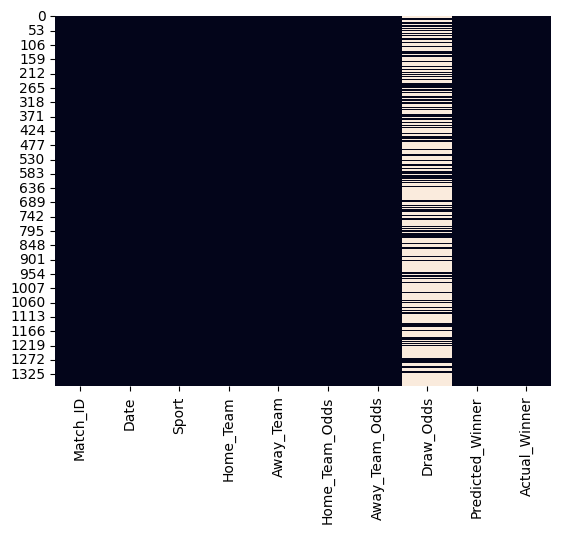

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.figzize=(10,10)
plt.show()

### ***Check Outliers in Dataset***

---



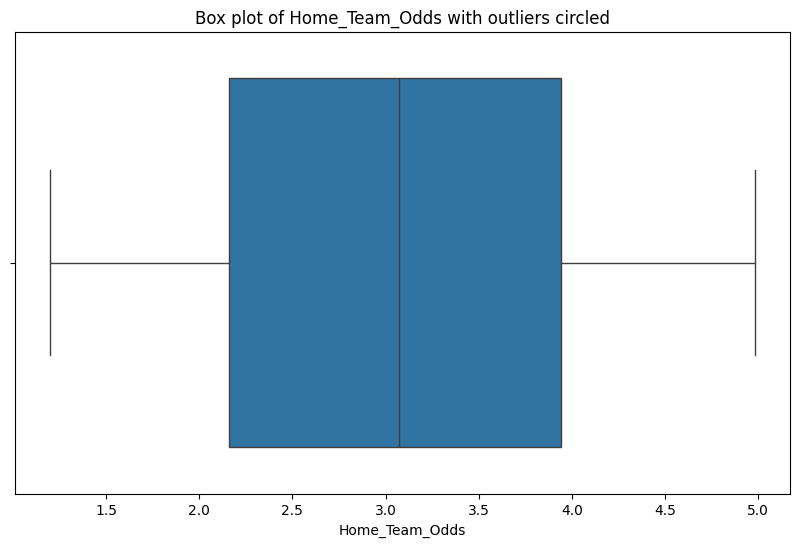

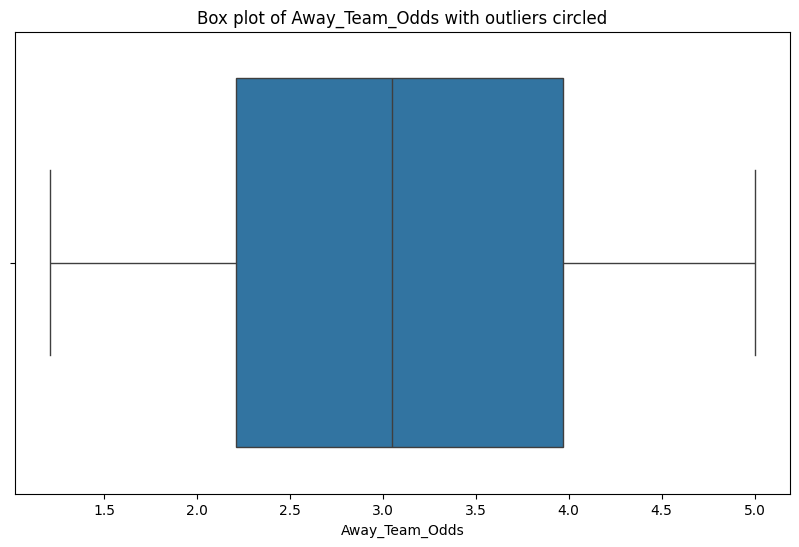

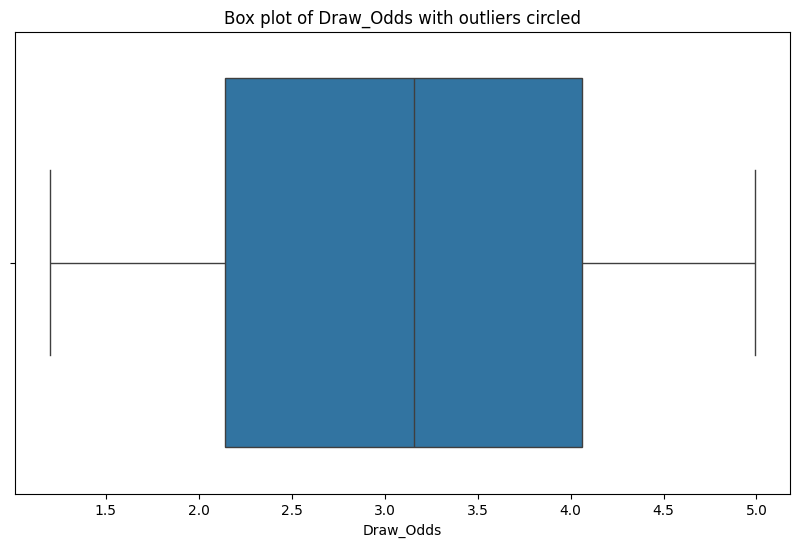

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers_and_plot(df, column):
  """
  Detects outliers using the IQR method and plots them on a box plot.

  Args:
      df (pd.DataFrame): The input DataFrame.
      column (str): The name of the column to analyze for outliers.
  """
  # Check if the column is numeric
  if not pd.api.types.is_numeric_dtype(df[column]):
      print(f"Skipping outlier detection for non-numeric column: {column}")
      return

  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Box plot of {column} with outliers circled')

  # Calculate IQR
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  # Define outlier bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identify outliers
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

  # Plot outliers as red circles
  for i, txt in enumerate(outliers.index):
      plt.scatter(outliers[column].iloc[i], 0, color='red', s=100, facecolors='none', edgecolors='r', linewidth=2)
      # Optional: Add annotation for the outlier point
      # plt.annotate(txt, (outliers[column].iloc[i], 0), textcoords="offset points", xytext=(0,10), ha='center')

  plt.show()

# Example usage: Analyze numerical columns for outliers
numerical_columns = ['Home_Team_Odds', 'Away_Team_Odds', 'Draw_Odds']
for col in numerical_columns:
    detect_outliers_and_plot(df, col)

### ***Analysis Data using Viusalizations***

---


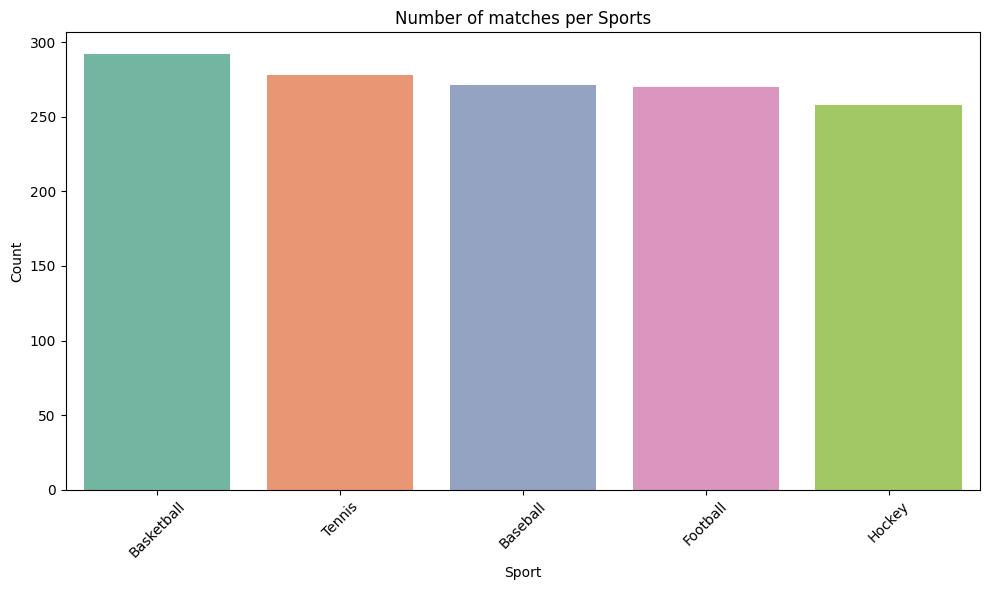

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sport', order=df['Sport'].value_counts().index, palette='Set2')
plt.title('Number of matches per Sports')
plt.xlabel('Sport')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the counts of each sport
sport_counts = df['Sport'].value_counts().reset_index()
sport_counts.columns = ['Sport', 'Count']

# Create the Plotly countplot
fig = px.bar(sport_counts, x='Sport', y='Count', title='Number of matches per Sports',
             labels={'Sport': 'Sport', 'Count': 'Count'})

# Update layout for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()

In [ ]:
# Calculate the counts of each sport
winner_counts = df['Predicted_Winner'].value_counts().reset_index()
winner_counts.columns = ['Predicted_Winner', 'Actual_Winner']

# Create the Plotly countplot
fig = px.bar(sport_counts, x=['Correct', 'Incorrect'], y=[(df['Predicted_Winner'] == df['Actual_Winner']).sum(),
                                                          (df['Predicted_Winner'] != df['Actual_Winner']).sum()], title='Prediction Accuracy Count',
             labels={'Predicted_Winner': 'Predicted_Winner', 'Actual_Winner': 'Actual_Winner'})

# Update layout for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()

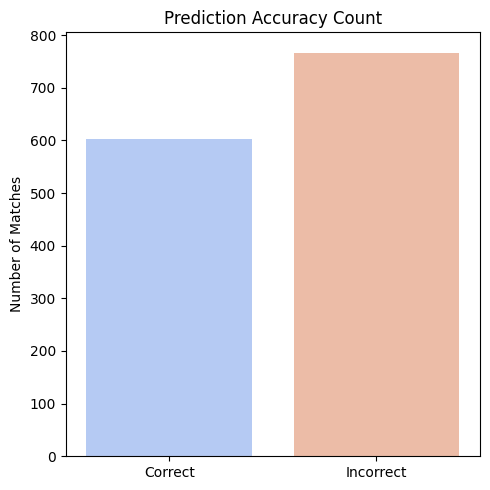

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x=['Correct', 'Incorrect'],
            y=[(df['Predicted_Winner'] == df['Actual_Winner']).sum(),
               (df['Predicted_Winner'] != df['Actual_Winner']).sum()],
            palette='coolwarm')
plt.title('Prediction Accuracy Count')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()

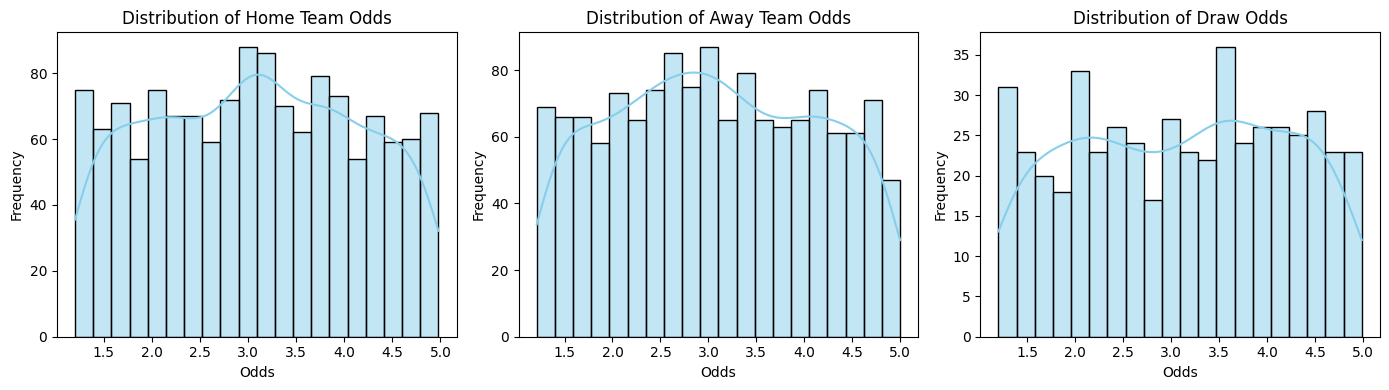

In [ ]:
plt.figure(figsize=(14, 4))

for i, col in enumerate(['Home_Team_Odds', 'Away_Team_Odds', 'Draw_Odds']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {col.replace("_", " ")}')
    plt.xlabel('Odds')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=3, subplot_titles=('Distribution of Home Team Odds', 'Distribution of Away Team Odds', 'Distribution of Draw Odds'))

fig.add_trace(
    go.Histogram(x=df['Home_Team_Odds'], nbinsx=20, name='Home Team Odds', marker_color='skyblue'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df['Away_Team_Odds'], nbinsx=20, name='Away Team Odds', marker_color='skyblue'),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=df['Draw_Odds'], nbinsx=20, name='Draw Odds', marker_color='skyblue'),
    row=1, col=3
)

fig.update_layout(showlegend=False, title_text="Distribution of Odds", height=400, width=1000)
fig.show()

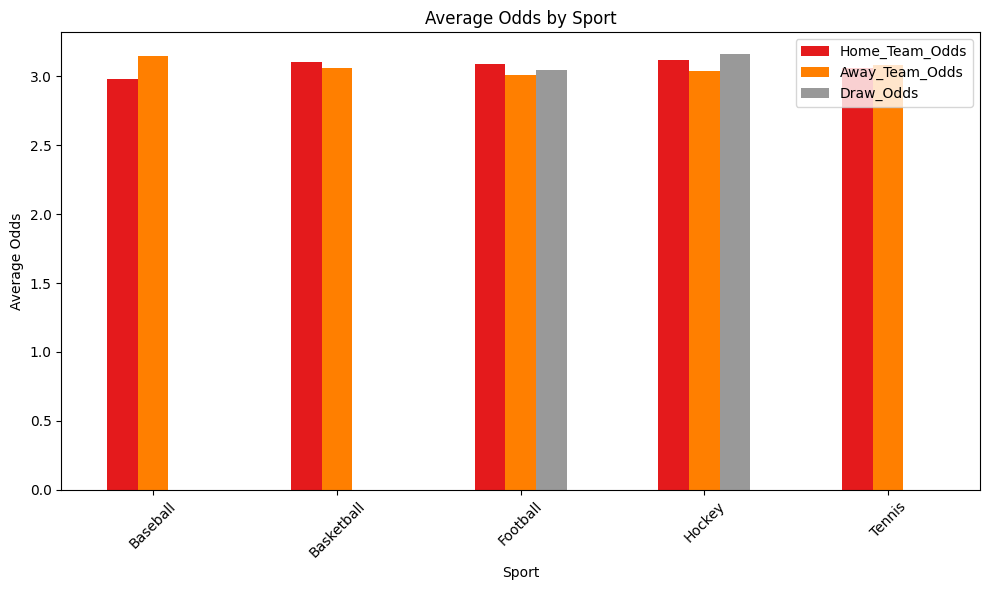

In [ ]:
avg_odds = df.groupby('Sport')[['Home_Team_Odds', 'Away_Team_Odds', 'Draw_Odds']].mean().reset_index()

avg_odds.plot(x='Sport', kind='bar', figsize=(10, 6), stacked=False, colormap='Set1')
plt.title('Average Odds by Sport')
plt.xlabel('Sport')
plt.ylabel('Average Odds')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

avg_odds = df.groupby('Sport')[['Home_Team_Odds', 'Away_Team_Odds', 'Draw_Odds']].mean().reset_index()

fig = px.bar(avg_odds, x='Sport', y=['Home_Team_Odds', 'Away_Team_Odds', 'Draw_Odds'],
             title='Average Odds by Sport',
             labels={'value': 'Average Odds', 'variable': 'Odds Type'},
             barmode='group')

fig.update_layout(xaxis_tickangle=-45)
fig.show()

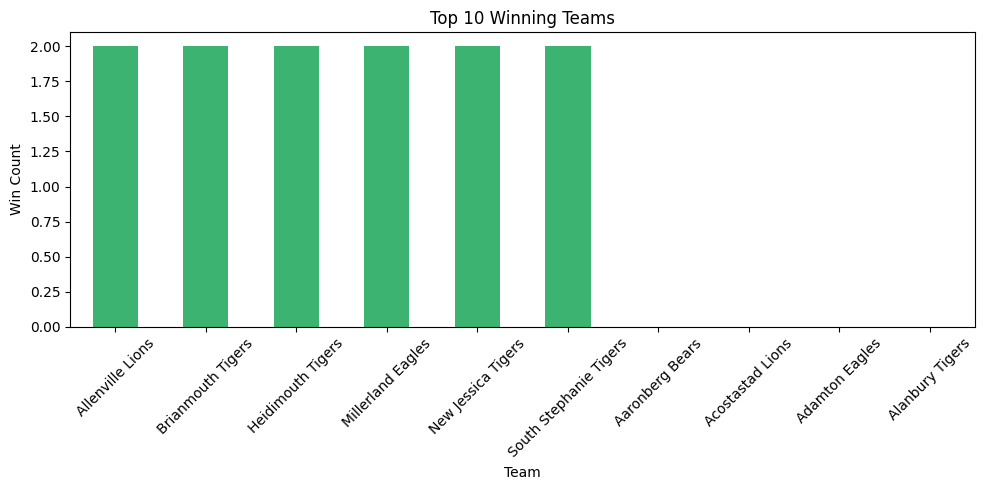

In [ ]:
home_wins = df[df['Actual_Winner'] == df['Home_Team']]['Home_Team'].value_counts()
away_wins = df[df['Actual_Winner'] == df['Away_Team']]['Away_Team'].value_counts()

team_wins = (home_wins + away_wins).sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
team_wins.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Winning Teams')
plt.ylabel('Win Count')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

# Calculate wins for home and away teams
home_wins = df[df['Actual_Winner'] == df['Home_Team']].groupby('Home_Team').size().reset_index(name='wins')
home_wins.rename(columns={'Home_Team': 'team'}, inplace=True)

away_wins = df[df['Actual_Winner'] == df['Away_Team']].groupby('Away_Team').size().reset_index(name='wins')
away_wins.rename(columns={'Away_Team': 'team'}, inplace=True)

# Combine home and away wins
total_wins = pd.concat([home_wins, away_wins]).groupby('team')['wins'].sum().reset_index()

# Sort by wins and get top 10
top_10_teams = total_wins.sort_values(by='wins', ascending=False).head(10)

# Filter the original dataframe to include only top 10 teams
df_top10 = df[df['Home_Team'].isin(top_10_teams['team']) | df['Away_Team'].isin(top_10_teams['team'])].copy()
df_top10['Date'] = pd.to_datetime(df_top10['Date'])
df_top10 = df_top10.sort_values('Date')

# Create the animated bar plot
fig = px.bar(df_top10, x='Actual_Winner', y=df_top10.groupby('Actual_Winner').cumcount() + 1,
             animation_frame=df_top10['Date'].dt.strftime('%Y-%m-%d'),
             title='Top 10 Winning Teams Over Time',
             labels={'x': 'Team', 'y': 'Win Count'},
             height=500)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

### ***Encode the dataset using LabelEncoder***

---



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid modifying the original
df_encoded = df.copy()

# Drop unnecessary columns
df_encoded = df_encoded.drop(columns=['Match_ID', 'Date'])

# Initialize LabelEncoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Sport', 'Home_Team', 'Away_Team', 'Predicted_Winner', 'Actual_Winner']

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()

,Sport,Home_Team,Away_Team,Home_Team_Odds,Away_Team_Odds,Draw_Odds,Predicted_Winner,Actual_Winner
0,1,325,344,3.62,3.99,NaN,281,316
1,1,1035,838,1.84,2.84,NaN,884,882
2,0,6,1268,3.93,3.29,NaN,10,10
3,4,554,1056,3.70,3.61,NaN,918,485
4,4,78,1338,2.26,2.52,NaN,1160,64


### ***Split the dataset into Train and Test Two Parts***

---



In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['Match_ID', 'Date', 'Predicted_Winner'])

# Label encode categorical columns
le = LabelEncoder()
for col in ['Sport', 'Home_Team', 'Away_Team', 'Actual_Winner']:
    df[col] = le.fit_transform(df[col].astype(str))

# Split features and target
X = df.drop(columns=['Actual_Winner'])
y = df['Actual_Winner']

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')  # or 'median'
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ***Create a pipeline for find Best Algorthim Which performe best resluts***

---



In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds) * 100
    accuracy_results[name] = acc

In [ ]:
for model_name, acc in accuracy_results.items():
    print(f"{model_name}: {acc:.2f}%")

Logistic Regression: 7.66%
Decision Tree: 2.92%
Random Forest: 9.12%
Naive Bayes: 9.49%
K-Nearest Neighbors: 4.01%
Support Vector Machine: 9.49%


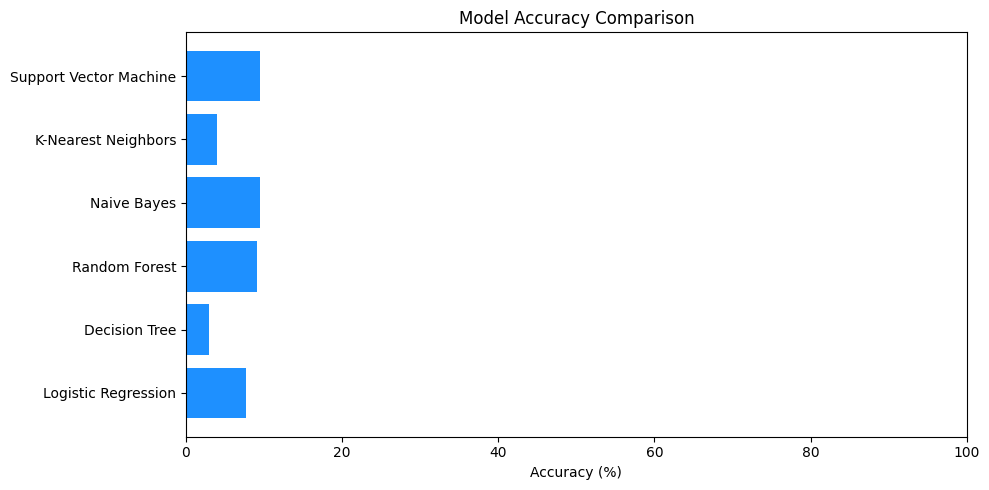

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(list(accuracy_results.keys()), list(accuracy_results.values()), color='dodgerblue')
plt.xlabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

In [ ]:
print("Best Algorithm:", max(accuracy_results, key=accuracy_results.get))

Best Algorithm: Naive Bayes


# ***Save The model***

In [ ]:
import pickle

# Save the best model to a file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved successfully as best_model.pkl")

NameError: name 'best_model' is not defined